In [213]:
#数据准备
from sklearn.datasets import make_circles
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# 生成10000个样本的二元分类数据
n_samples = 10000
X, y = make_circles(n_samples, noise=0.03, random_state=42)
# 数据转换为PyTorch张量
X = torch.FloatTensor(X)
y = torch.FloatTensor(y).unsqueeze(1)
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

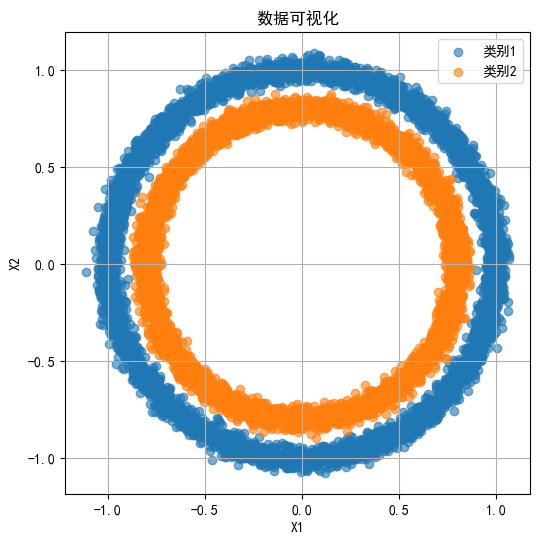

In [215]:
#作业一:数据可视化和基础模型
#1.1数据可视化
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #设置中文字体
plt.rcParams['axes.unicode_minus'] = False  #正确显示负号
#转成numpy数据,方便可视化
X_np = X.numpy()
y_np = y.numpy().reshape(-1)
#绘制图形
plt.figure(figsize=(6, 6))
plt.scatter(X_np[y_np == 0, 0], X_np[y_np == 0, 1], label='类别1', alpha=0.6)
plt.scatter(X_np[y_np == 1, 0], X_np[y_np == 1, 1], label='类别2', alpha=0.6)
plt.title("数据可视化")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True)
plt.show()

In [217]:
#1.2构建全连接神经网络
class SimpleFCNN(nn.Module):
    def __init__(self):
        super(SimpleFCNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 32),#输入层为二维数据,将其映射到隐藏层的32个神经元
            nn.ReLU(),      # 使用ReLU激活函数，增加非线性表达能力
            nn.Linear(32, 16),#隐藏层2,将32维的数据映射为16个神经元
            nn.ReLU(),
            nn.Linear(16, 1),#将隐藏层2的16个神经元归类为一个结果并输出
            nn.Sigmoid()#二分类激活函数,将输出值控制在(0-1)之间,表示概率
        )
    def forward(self, x): #向前传播,定义数据从输入层到输出层的计算过程
        return self.model(x)

In [223]:
#1.3训练模型
#1.3.1实例化模型、损失函数和优化器
import time
start = time.time()
model = SimpleFCNN()
criterion = nn.BCELoss()  # 二分类交叉熵
optimizer = optim.Adam(model.parameters(), lr=0.01)
#1.3.2记录准确率
def get_accuracy(y_pred, y_true):
    predicted = (y_pred >= 0.5).float()
    correct = (predicted == y_true).sum().item()
    return correct / len(y_true)
#1.3.3训练过程
epochs = 50
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    #评估准确率
    with torch.no_grad():
        acc = get_accuracy(y_pred, y_train)
    print(f"次数 {epoch+1}/{epochs}, 丢失: {loss.item():.4f},准确率: {acc:.4f}")
end = time.time()
print(f"训练耗时: {end - start:.2f} 秒")

次数 1/50, 丢失: 0.6940,准确率: 0.5156
次数 2/50, 丢失: 0.6922,准确率: 0.5278
次数 3/50, 丢失: 0.6907,准确率: 0.5289
次数 4/50, 丢失: 0.6894,准确率: 0.5228
次数 5/50, 丢失: 0.6879,准确率: 0.5397
次数 6/50, 丢失: 0.6860,准确率: 0.5609
次数 7/50, 丢失: 0.6839,准确率: 0.5779
次数 8/50, 丢失: 0.6815,准确率: 0.5874
次数 9/50, 丢失: 0.6788,准确率: 0.5926
次数 10/50, 丢失: 0.6757,准确率: 0.5982
次数 11/50, 丢失: 0.6721,准确率: 0.6029
次数 12/50, 丢失: 0.6682,准确率: 0.6142
次数 13/50, 丢失: 0.6637,准确率: 0.6348
次数 14/50, 丢失: 0.6587,准确率: 0.6684
次数 15/50, 丢失: 0.6530,准确率: 0.7087
次数 16/50, 丢失: 0.6467,准确率: 0.7439
次数 17/50, 丢失: 0.6398,准确率: 0.7718
次数 18/50, 丢失: 0.6322,准确率: 0.7951
次数 19/50, 丢失: 0.6238,准确率: 0.8146
次数 20/50, 丢失: 0.6145,准确率: 0.8301
次数 21/50, 丢失: 0.6045,准确率: 0.8454
次数 22/50, 丢失: 0.5936,准确率: 0.8640
次数 23/50, 丢失: 0.5819,准确率: 0.8891
次数 24/50, 丢失: 0.5693,准确率: 0.9197
次数 25/50, 丢失: 0.5557,准确率: 0.9434
次数 26/50, 丢失: 0.5412,准确率: 0.9586
次数 27/50, 丢失: 0.5259,准确率: 0.9686
次数 28/50, 丢失: 0.5098,准确率: 0.9766
次数 29/50, 丢失: 0.4929,准确率: 0.9849
次数 30/50, 丢失: 0.4752,准确率: 0.9902
次数 31/50, 丢失: 0.456

In [225]:
#作业二：数据扩展为序列格式
#2.1.1提取原始特征
x= X[:, 0]#提取第一列
y= X[:, 1]#提取第二列
# 扩展为5维
x_sq=x ** 2
y_sq=y ** 2
xy= x*y
#2.1.2拼接为新特征向量 (10000, 5)
X_expanded = torch.stack([x,y, x_sq, y_sq, xy], dim=1)

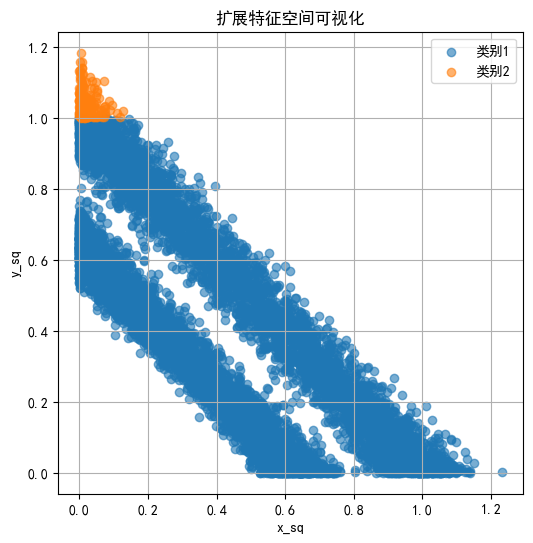

In [227]:
#2.2提取特征绘制散点图
import matplotlib.pyplot as plt
import numpy as np
#2.2.1将数据类型转为numpy,便于操作
X_np = X_expanded.numpy()  
y_np = y.numpy().reshape(-1)  
y_np = y_np.astype(int)
#2.2.2分类并绘图
X0 = X_np[y_np == 0]  # 类别 1
X1 = X_np[y_np == 1]  # 类别 2
plt.figure(figsize=(6, 6))
plt.scatter(X0[:, 2], X0[:, 3], label='类别1', alpha=0.6)
plt.scatter(X1[:, 2], X1[:, 3], label='类别2', alpha=0.6)
plt.xlabel("x_sq")
plt.ylabel("y_sq")
plt.title("扩展特征空间可视化")
plt.legend()
plt.grid(True)
plt.show()

In [228]:
#2.3将扩展后的数据reshape为适合1D CNN的格式
X_cnn_input = X_expanded.unsqueeze(1)  # 在维度1上添加通道，shape: (10000, 1, 5)
print(X_cnn_input.shape)

torch.Size([10000, 1, 5])


In [231]:
#sp.1重新划分训练集和测试集
X_train_cnn, X_test_cnn, y_train, y_test = train_test_split(X_cnn_input, y, test_size=0.2, random_state=42)
# 保证标签维度和数据类型正确
y_train = y_train.view(-1, 1).float()  # shape: (8000, 1), 类型: float
y_test = y_test.view(-1, 1).float()    # shape: (2000, 1), 类型: float

In [233]:
#作业三:构建1D卷积神经网络
#3.1建立神经网络
import torch.nn as nn
class CNN1DClassifier(nn.Module):
    def __init__(self):
        super(CNN1DClassifier, self).__init__()
        self.conv = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3)
        self.relu = nn.ReLU()
        self.global_pool = nn.AdaptiveAvgPool1d(1)  # 全局平均池化
        self.fc = nn.Linear(16, 1)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = self.conv(x)            
        x = self.relu(x)
        x = self.global_pool(x)     
        x = x.view(x.size(0), -1)   
        x = self.fc(x)              
        x = self.sigmoid(x)
        return x

In [235]:
#sp.2由于数据有问题，故重新建模市容下列数据
#原始生成标签
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=10000, noise=0.03, random_state=42)
X = torch.FloatTensor(X)
y = torch.FloatTensor(y).unsqueeze(1)  # shape: (10000, 1)，确保是 float 类型

# 特征扩展 + reshape
x = X[:, 0]
y_val = X[:, 1]
x_sq = x ** 2
y_sq = y_val ** 2
xy = x * y_val
X_expanded = torch.stack([x, y_val, x_sq, y_sq, xy], dim=1)
X_cnn_input = X_expanded.unsqueeze(1)

# 正确划分标签（y 是标签，不是上面扩展后的 y_val）
from sklearn.model_selection import train_test_split
X_train_cnn, X_test_cnn, y_train, y_test = train_test_split(
    X_cnn_input, y, test_size=0.2, random_state=42
)

# 标签处理
y_train = y_train.view(-1, 1).float()
y_test = y_test.view(-1, 1).float()


In [237]:
#3.2训练模型,检测准确率,与作业一进行对比
import time
start = time.time()
model_cnn = CNN1DClassifier()
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model_cnn.parameters(), lr=0.01)
epochs = 50
loss_list = []
acc_list = []
for epoch in range(epochs):
    model_cnn.train()
    optimizer.zero_grad()
    # 前向传播
    output = model_cnn(X_train_cnn)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    # 记录损失
    loss_list.append(loss.item())
    # 训练准确率
    with torch.no_grad():
        pred_label = (output >= 0.5).float()
        acc = (pred_label == y_train).float().mean().item()
        acc_list.append(acc)
    print(f"次数: {epoch+1}/{epochs}, 丢失: {loss.item():.4f}, 准确率: {acc:.4f}")
end = time.time()
print(f"训练耗时: {end - start:.2f} 秒")

次数: 1/50, 丢失: 0.6954, 准确率: 0.5016
次数: 2/50, 丢失: 0.6892, 准确率: 0.5016
次数: 3/50, 丢失: 0.6842, 准确率: 0.5600
次数: 4/50, 丢失: 0.6805, 准确率: 0.6489
次数: 5/50, 丢失: 0.6777, 准确率: 0.6310
次数: 6/50, 丢失: 0.6757, 准确率: 0.5673
次数: 7/50, 丢失: 0.6741, 准确率: 0.5504
次数: 8/50, 丢失: 0.6726, 准确率: 0.5263
次数: 9/50, 丢失: 0.6710, 准确率: 0.5135
次数: 10/50, 丢失: 0.6692, 准确率: 0.5131
次数: 11/50, 丢失: 0.6670, 准确率: 0.5173
次数: 12/50, 丢失: 0.6647, 准确率: 0.5270
次数: 13/50, 丢失: 0.6622, 准确率: 0.5414
次数: 14/50, 丢失: 0.6595, 准确率: 0.5604
次数: 15/50, 丢失: 0.6568, 准确率: 0.5900
次数: 16/50, 丢失: 0.6540, 准确率: 0.6410
次数: 17/50, 丢失: 0.6511, 准确率: 0.6895
次数: 18/50, 丢失: 0.6482, 准确率: 0.7139
次数: 19/50, 丢失: 0.6453, 准确率: 0.7301
次数: 20/50, 丢失: 0.6424, 准确率: 0.7450
次数: 21/50, 丢失: 0.6396, 准确率: 0.7560
次数: 22/50, 丢失: 0.6368, 准确率: 0.7660
次数: 23/50, 丢失: 0.6339, 准确率: 0.7735
次数: 24/50, 丢失: 0.6309, 准确率: 0.7765
次数: 25/50, 丢失: 0.6279, 准确率: 0.7771
次数: 26/50, 丢失: 0.6247, 准确率: 0.7785
次数: 27/50, 丢失: 0.6214, 准确率: 0.7793
次数: 28/50, 丢失: 0.6180, 准确率: 0.7807
次数: 29/50, 丢失: 0.6146, 准确率: 0

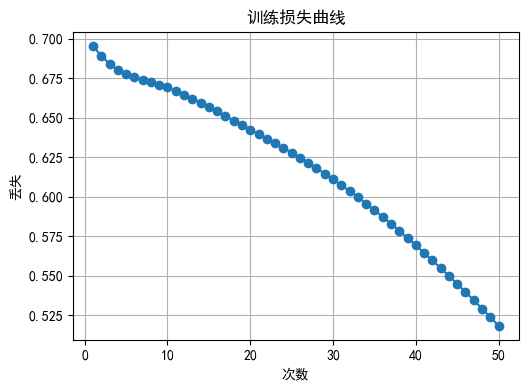

In [239]:
#3.3绘制损失曲线
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
# 损失曲线
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), loss_list, marker='o')
plt.title("训练损失曲线")
plt.xlabel("次数")
plt.ylabel("丢失")
plt.grid(True)
plt.tight_layout()
plt.show()

In [247]:
#sp.3重新定义数据集
import torch
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
# 1. 生成原始数据
n_samples = 10000
X, y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)
X = torch.FloatTensor(X)
y = torch.FloatTensor(y).unsqueeze(1)  # shape: (10000, 1)
# 2. 特征扩展：x, y, x², y², x*y
x = X[:, 0]
y_val = X[:, 1]
x_sq = x ** 2
y_sq = y_val ** 2
xy = x * y_val
X_expanded = torch.stack([x, y_val, x_sq, y_sq, xy], dim=1)  # shape: (10000, 5)

In [249]:
#作业四：构建2D卷积神经网络
#4.1将样本的五个特征排列成一个小图像
#4.1.1方法一
def to_image_method1(x):
    img = torch.zeros(8, 8)   # 创建 8x8空白图像
    img[0, :5] = x            # 把特征放入第一行前5个像素
    return img
#调用方法一
X_images = convert_to_image_tensor(X_expanded)

In [187]:
#4.1.2方法二
def to_image_method2(x):
    img = torch.zeros(8, 8)
    for i in range(5):
        img[i, 0] = x[i]      #将每个特征放入第1列，从上往下
    return img
#调用方法二
X_images = torch.stack([to_image_method2(x) for x in X_expanded]).unsqueeze(1)

In [251]:
#4.2构建简单的2D CNN
#4.2.1划分训练集和测试集
from sklearn.model_selection import train_test_split
X_train_2d, X_test_2d, y_train, y_test = train_test_split(
    X_images, y, test_size=0.2, random_state=42
)
y_train = y_train.view(-1, 1).float()
y_test = y_test.view(-1, 1).float()

In [253]:
#4.2.2构建神经网络模型
import torch.nn as nn
class CNN2DClassifier(nn.Module):
    def __init__(self):
        super(CNN2DClassifier, self).__init__()
        self.conv = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3)  # 输出8个通道
        self.relu = nn.ReLU()
        self.pool = nn.AdaptiveAvgPool2d((1, 1))  # 全局平均池化为 1x1
        self.fc = nn.Linear(8, 1)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = self.conv(x)         
        x = self.relu(x)
        x = self.pool(x)         
        x = x.view(x.size(0), -1)  
        x = self.fc(x)           
        x = self.sigmoid(x)
        return x

In [261]:
#sp.4训练模型
import time
model_2d = CNN2DClassifier()
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model_2d.parameters(), lr=0.01)
epochs = 50
loss_list = []
start = time.time()
for epoch in range(epochs):
    model_2d.train()
    optimizer.zero_grad()
    output = model_2d(X_train_2d)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())
    with torch.no_grad():
        acc = ((output >= 0.5).float() == y_train).float().mean().item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Accuracy: {acc:.4f}")
end = time.time()
print(f"\n总耗时：{end - start:.2f} 秒")

Epoch 1/50, Loss: 0.7017, Accuracy: 0.4984
Epoch 2/50, Loss: 0.7001, Accuracy: 0.4984
Epoch 3/50, Loss: 0.6987, Accuracy: 0.4984
Epoch 4/50, Loss: 0.6975, Accuracy: 0.4984
Epoch 5/50, Loss: 0.6963, Accuracy: 0.4984
Epoch 6/50, Loss: 0.6953, Accuracy: 0.4984
Epoch 7/50, Loss: 0.6944, Accuracy: 0.4984
Epoch 8/50, Loss: 0.6936, Accuracy: 0.4984
Epoch 9/50, Loss: 0.6929, Accuracy: 0.4984
Epoch 10/50, Loss: 0.6924, Accuracy: 0.4984
Epoch 11/50, Loss: 0.6919, Accuracy: 0.4984
Epoch 12/50, Loss: 0.6916, Accuracy: 0.4984
Epoch 13/50, Loss: 0.6914, Accuracy: 0.6425
Epoch 14/50, Loss: 0.6912, Accuracy: 0.5016
Epoch 15/50, Loss: 0.6911, Accuracy: 0.5016
Epoch 16/50, Loss: 0.6910, Accuracy: 0.5016
Epoch 17/50, Loss: 0.6909, Accuracy: 0.5016
Epoch 18/50, Loss: 0.6907, Accuracy: 0.5016
Epoch 19/50, Loss: 0.6905, Accuracy: 0.5016
Epoch 20/50, Loss: 0.6902, Accuracy: 0.5016
Epoch 21/50, Loss: 0.6899, Accuracy: 0.5016
Epoch 22/50, Loss: 0.6896, Accuracy: 0.5016
Epoch 23/50, Loss: 0.6893, Accuracy: 0.50

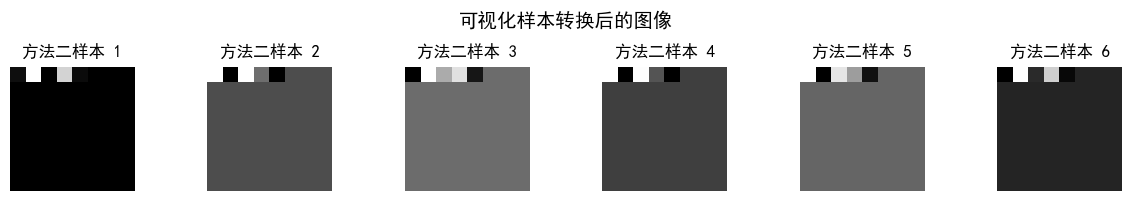

In [263]:
#4.3可视化样本转换后的图像
import matplotlib.pyplot as plt
#可视化前6个样本的图像
samples_to_show = 6
fig, axes = plt.subplots(1, samples_to_show, figsize=(12, 2))
for i in range(samples_to_show):
    img = X_images[i].squeeze(0)  
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"方法二样本 {i+1}")
    axes[i].axis('off')
plt.suptitle("可视化样本转换后的图像", fontsize=14)
plt.tight_layout()
plt.show()

In [269]:
from sklearn.datasets import make_circles
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time

# 生成数据
n_samples = 10000
X, y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)
X = torch.FloatTensor(X)
y = torch.FloatTensor(y).unsqueeze(1)

# 特征扩展：[x, y, x², y², xy]
x1 = X[:, 0]
x2 = X[:, 1]
x_sq = x1 ** 2
y_sq = x2 ** 2
xy = x1 * x2
X_expanded = torch.stack([x1, x2, x_sq, y_sq, xy], dim=1)

# 划分训练集测试集
X_train, X_test, y_train, y_test = train_test_split(
    X_expanded, y, test_size=0.2, random_state=42)


In [271]:
class SimpleFCNN(nn.Module):
    def __init__(self):
        super(SimpleFCNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(5, 32),      # 输入是5维扩展特征
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()           # 二分类激活函数
        )
    
    def forward(self, x):
        return self.model(x)


In [273]:
model = SimpleFCNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

def get_accuracy(y_pred, y_true):
    predicted = (y_pred >= 0.5).float()
    correct = (predicted == y_true).sum().item()
    return correct / len(y_true)

# 训练
epochs = 50
start = time.time()
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

    acc = get_accuracy(output, y_train)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Accuracy: {acc:.4f}")
end = time.time()
print(f"\n✅ 作业一训练完成，耗时：{end - start:.2f} 秒")


Epoch 1/50, Loss: 0.7018, Accuracy: 0.4133
Epoch 2/50, Loss: 0.6975, Accuracy: 0.4924
Epoch 3/50, Loss: 0.6941, Accuracy: 0.4984
Epoch 4/50, Loss: 0.6910, Accuracy: 0.4984
Epoch 5/50, Loss: 0.6875, Accuracy: 0.4984
Epoch 6/50, Loss: 0.6839, Accuracy: 0.4984
Epoch 7/50, Loss: 0.6799, Accuracy: 0.5084
Epoch 8/50, Loss: 0.6753, Accuracy: 0.5949
Epoch 9/50, Loss: 0.6698, Accuracy: 0.6511
Epoch 10/50, Loss: 0.6635, Accuracy: 0.6923
Epoch 11/50, Loss: 0.6562, Accuracy: 0.7574
Epoch 12/50, Loss: 0.6478, Accuracy: 0.7964
Epoch 13/50, Loss: 0.6381, Accuracy: 0.8169
Epoch 14/50, Loss: 0.6270, Accuracy: 0.8335
Epoch 15/50, Loss: 0.6143, Accuracy: 0.8619
Epoch 16/50, Loss: 0.5996, Accuracy: 0.8989
Epoch 17/50, Loss: 0.5826, Accuracy: 0.9355
Epoch 18/50, Loss: 0.5637, Accuracy: 0.9671
Epoch 19/50, Loss: 0.5436, Accuracy: 0.9852
Epoch 20/50, Loss: 0.5211, Accuracy: 0.9920
Epoch 21/50, Loss: 0.4958, Accuracy: 0.9946
Epoch 22/50, Loss: 0.4690, Accuracy: 0.9958
Epoch 23/50, Loss: 0.4408, Accuracy: 0.99

In [275]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    acc_test = get_accuracy(y_pred, y_test)
print(f"✅ 作业一测试集准确率：{acc_test:.4f}")


✅ 作业一测试集准确率：1.0000


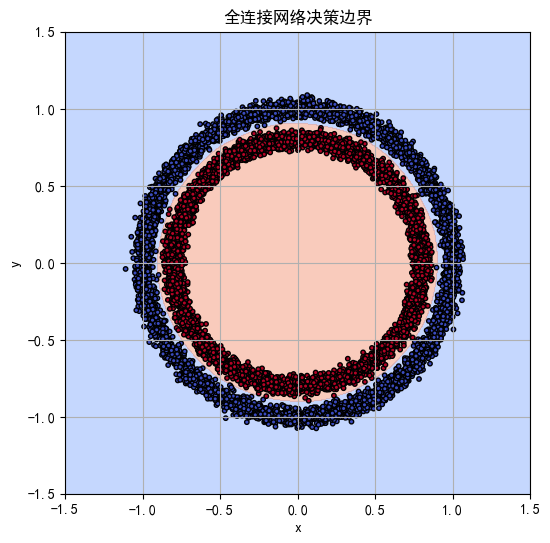

In [281]:
# 创建网格点（原始二维空间）
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 300),
                     np.linspace(-1.5, 1.5, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
x1 = torch.tensor(grid[:, 0], dtype=torch.float32)
x2 = torch.tensor(grid[:, 1], dtype=torch.float32)
x_sq = x1 ** 2
y_sq = x2 ** 2
xy = x1 * x2
grid_expanded = torch.stack([x1, x2, x_sq, y_sq, xy], dim=1)
# 模型预测
model.eval()
with torch.no_grad():
    preds = model(grid_expanded).view(xx.shape)
# 绘图
plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, preds, levels=[0, 0.5, 1], cmap='coolwarm', alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y.numpy().reshape(-1), cmap='coolwarm', s=10, edgecolor='k')
plt.title("全连接网络决策边界")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()